### Haberman Survival Study

#### Objective: Given the features (age, year and nodes), we need to predict if the peson will survive or not.
    Year is not an important feature though

In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install statsmodels

    100% |████████████████████████████████| 17.3MB 139kB/s eta 0:00:01
    100% |████████████████████████████████| 10.1MB 279kB/s eta 0:00:01
    100% |████████████████████████████████| 512kB 3.6MB/s eta 0:00:01
    100% |████████████████████████████████| 215kB 12.5MB/s ta 0:00:01
    100% |████████████████████████████████| 13.0MB 222kB/s eta 0:00:01
    100% |████████████████████████████████| 24.8MB 101kB/s eta 0:00:01MB 44.0MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 26.5MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 26.8MB/s ta 0:00:01
    100% |████████████████████████████████| 7.4MB 337kB/s eta 0:00:01
    100% |████████████████████████████████| 235kB 8.9MB/s eta 0:00:01


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
# Load csv
df = pd.read_csv("haberman.csv")
df

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [4]:
# check the shape, columns and count
print(df.shape)

(306, 4)


306 datapoints and 4 features

In [5]:
print(df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [6]:
print(df['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


Alive status count is 225 and not alive status count is 81

In [7]:
# summary of dataset
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Bivariate plot

#### 1) Scatter plot

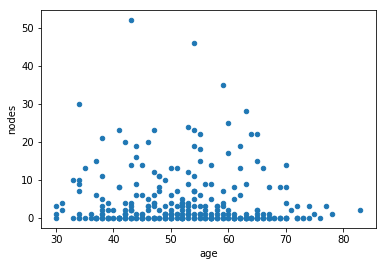

In [8]:
# simple scatter plot
df.plot(kind="scatter",x = "age",y="nodes")
plt.show()

1. We are unable to differentiate between survived and not survived points.
2. Nodes are concentrated much in the area where age is geater than or equal to 45 and less than or equal to 60

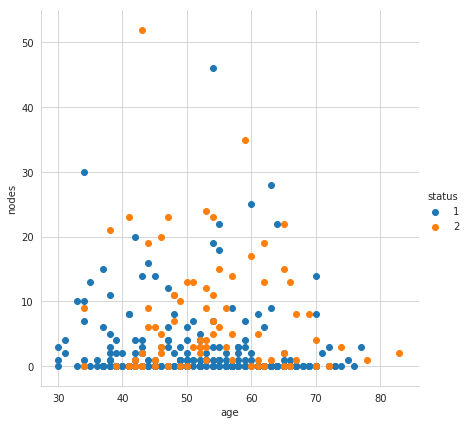

In [9]:
# Applying color to scatter plot
# Making use of seaborn

sb.set_style("whitegrid")
sb.FacetGrid(df,hue="status",height = 6)\
    .map(plt.scatter,"age","nodes")\
    .add_legend()

plt.show()

1. Both the points are much overlapped, so cannot make a proper conclusion

#### Mutli-variate plot

#### 1.1) pair plot

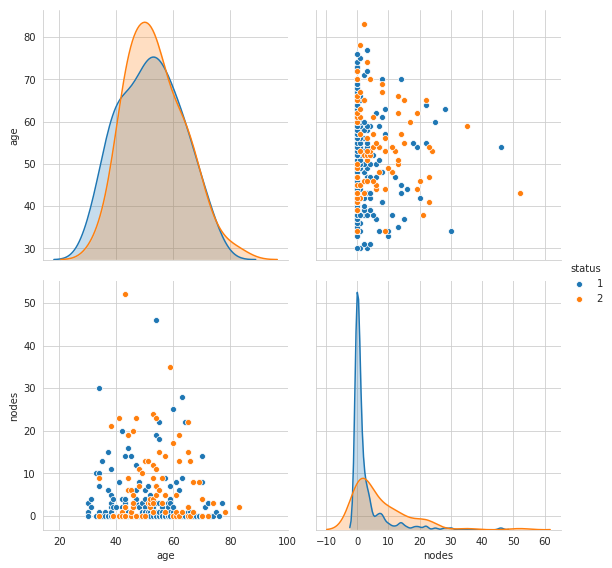

In [10]:
haberSet = df[["age","nodes","status"]]
sb.set_style("whitegrid")
sb.pairplot(haberSet,x_vars=("age","nodes"),y_vars=("age","nodes"),hue="status",height = 4)
plt.show()

1. It is harder to separate age from nodes that matter for survival status.
2. We can conclude that both the features are important for knowing the survival status.
3. In the PDF though the survival status is overlapped, we can somewhat see the higher survival status for nodes between 1 to 3 or 4

### Univariate plots

(225, 4)
(81, 4)


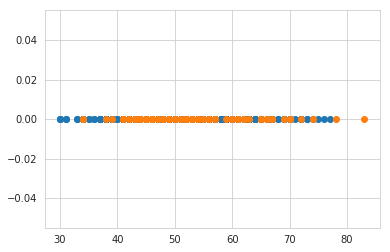

In [15]:
survived = df.loc[df["status"] == 1]
not_survived = df.loc[df["status"] == 2]

print(survived.shape)
print(not_survived.shape)

# Ploting on basis of age

plt.plot(survived["age"],np.zeros_like(survived["age"]),'o')
plt.plot(not_survived["age"],np.zeros_like(not_survived["age"]),'o')
plt.show()

1. The points are overlapped, so cannot conclude on the basis of age

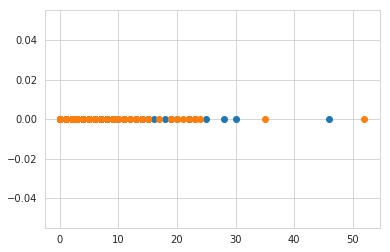

In [16]:
# plotting on basis of nodes

plt.plot(survived["nodes"],np.zeros_like(survived["nodes"]),'o')
plt.plot(not_survived["nodes"],np.zeros_like(not_survived["nodes"]),'o')
plt.show()
         

1. Here too the points seems to be much overlapped, so cannot find a proper conclusion

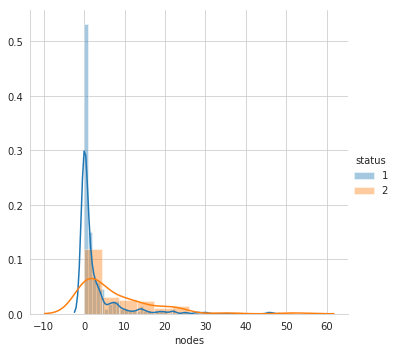

In [17]:
sb.set_style("whitegrid")
sb.FacetGrid(df,hue="status",height=5)\
.map(sb.distplot,'nodes')\
.add_legend()

plt.show()

## Considering the above graph observation of nodes.
1. We can conclude that

    if the nodes <= 2, then the chances of surviving is more.

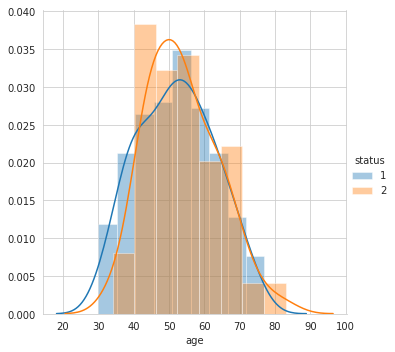

In [18]:
sb.set_style("whitegrid")
sb.FacetGrid(df,hue="status",height=5)\
.map(sb.distplot,"age")\
.add_legend()

plt.show()

The curves are very much overlapped, hence we cannot conclude on basis of age.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


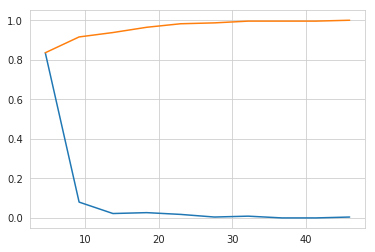

In [19]:
# Interpreting a PDF

# As we concluded above nodes feature plays an important role than Age

# Plot CDF of nodes

counts, bin_edges = np.histogram(survived['nodes'],bins=10,density=True)
pdf = counts/sum(counts)

print(pdf)

cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()


We can see from this graph, more than 80% of surving data points get covered when nodes <= 3

[0.39506173 0.17283951 0.0617284  0.08641975 0.04938272 0.08641975
 0.01234568 0.03703704 0.0617284  0.01234568 0.         0.
 0.         0.01234568 0.         0.         0.         0.
 0.         0.01234568]
[0.39506173 0.56790123 0.62962963 0.71604938 0.7654321  0.85185185
 0.86419753 0.90123457 0.96296296 0.97530864 0.97530864 0.97530864
 0.97530864 0.98765432 0.98765432 0.98765432 0.98765432 0.98765432
 0.98765432 1.        ]


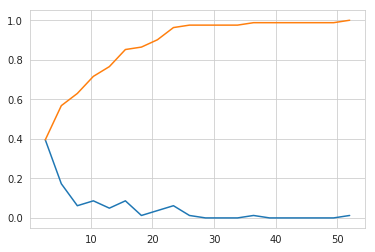

In [20]:
counts,bin_edges = np.histogram(not_survived['nodes'],bins=20,density=True)

pdf = counts/sum(counts)
print(pdf)

cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

We can see from this graph, 40% of non-surving data points get covered when nodes <= 4

[0.02222222 0.03111111 0.04444444 0.06222222 0.04444444 0.08
 0.04       0.05333333 0.09777778 0.06666667 0.07555556 0.08888889
 0.04888889 0.04444444 0.08       0.03111111 0.02222222 0.04
 0.01333333 0.01333333]
[0.02222222 0.05333333 0.09777778 0.16       0.20444444 0.28444444
 0.32444444 0.37777778 0.47555556 0.54222222 0.61777778 0.70666667
 0.75555556 0.8        0.88       0.91111111 0.93333333 0.97333333
 0.98666667 1.        ]


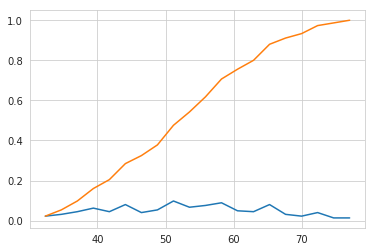

In [21]:
# Plots for age

counts,bin_edges = np.histogram(survived["age"],bins=20,density=True)

pdf = counts/sum(counts)

print(pdf)

cdf = np.cumsum(pdf)

print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

[0.02469136 0.01234568 0.04938272 0.07407407 0.12345679 0.07407407
 0.07407407 0.12345679 0.09876543 0.03703704 0.03703704 0.08641975
 0.04938272 0.04938272 0.03703704 0.01234568 0.01234568 0.01234568
 0.         0.01234568]
[0.02469136 0.03703704 0.08641975 0.16049383 0.28395062 0.35802469
 0.43209877 0.55555556 0.65432099 0.69135802 0.72839506 0.81481481
 0.86419753 0.91358025 0.95061728 0.96296296 0.97530864 0.98765432
 0.98765432 1.        ]


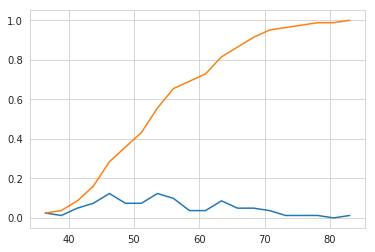

In [22]:
counts, bin_edges = np.histogram(not_survived["age"],bins=20,density=True)

pdf = counts/sum(counts)
print(pdf)

cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

From the above graphs, we are unable to make a proper conclusion on the basis of age

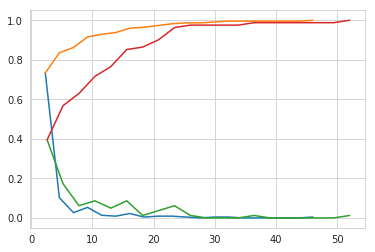

In [23]:
# Plotting both the survived and non-survived nodes points

counts,bin_edges = np.histogram(survived["nodes"],bins=20,density=True)

pdf = counts/sum(counts)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges = np.histogram(not_survived["nodes"],bins=20,density=True)

pdf = counts/sum(counts)

cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()

From this graph we can conclude that as the nodes got on increasing less is the chance of survival

In [24]:
# Mean & standard Deviation
print("Mean for Survived")
print(np.mean(survived["nodes"]))

print("Mean for non-survived")
print(np.mean(not_survived["nodes"]))

print("*"*30)
print("Standard deviation for survived")
print(np.std(survived["nodes"]))

print("Standard deviation for non-survived")
print(np.std(not_survived["nodes"]))

Mean for Survived
2.7911111111111113
Mean for non-survived
7.45679012345679
******************************
Standard deviation for survived
5.857258449412138
Standard deviation for non-survived
9.128776076761635


In [25]:
# Median Percentile and Quantile
print(np.median(survived["nodes"]))
print(np.median(not_survived["nodes"]))

print("*"*30,"Percentile for survived","*"*30)
print(np.percentile(survived["nodes"],90))
print(np.percentile(survived["nodes"],70))

print("*"*30,"Percentile for non-survived","*"*30)
print(np.percentile(not_survived["nodes"],90))
print(np.percentile(not_survived["nodes"],70))

0.0
4.0
****************************** Percentile for survived ******************************
8.0
2.0
****************************** Percentile for non-survived ******************************
20.0
9.0


In [26]:
# Quantiles
print("Quantiles")

print(np.percentile(survived["nodes"],np.arange(0,100,25)))
print(np.percentile(not_survived["nodes"],np.arange(0,100,25)))

Quantiles
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


To conclude from above
1. we can say that 75% of survived data points got covered, when nodes <= 3 
2. 25% of not survived data points got covered, when node <= 1
3. 50% of not survived data points got covered, when nodes <= 4
4. 75% of not survived data points got covered, when nodes <= 11

In [27]:
# Median Absolute deviation
from statsmodels import robust

print("Median absolute deviation")
print(robust.mad(survived["nodes"]))
print(robust.mad(not_survived["nodes"]))

Median absolute deviation
0.0
5.930408874022408


### Box plot whiskers

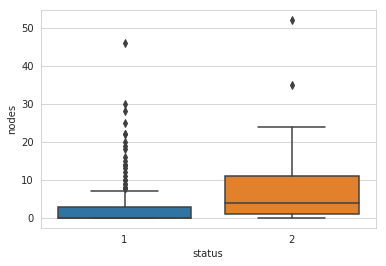

In [28]:
sb.boxplot(x= "status",y="nodes",data=df)
plt.show()

As mentioned above

    we can say that 75% of survived data points got covered, when nodes <= 3 
    25% of not survived data points got covered, when node <= 1
    50% of not survived data points got covered, when nodes <= 4
    75% of not survived data points got covered, when nodes <= 11
    
    Most of the survival points are concentrated at 0 - 4
    and non-survival points are concentrated at 1 - 11

### Violin plot

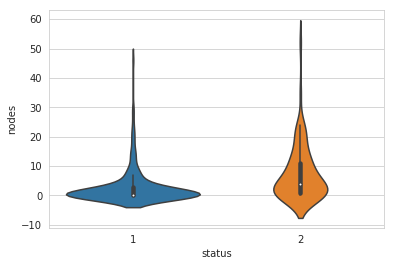

In [29]:
sb.violinplot(x="status",y="nodes",data=df)
plt.show()

We can see much of concentration, towards the 0 nodes with high chances of survival, and the chances decreases as the nodes go above 3

### Multivariate probability density, contour plot.

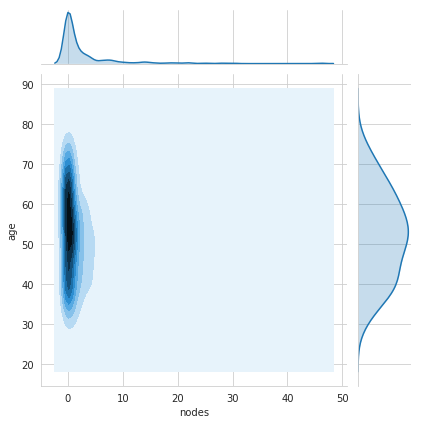

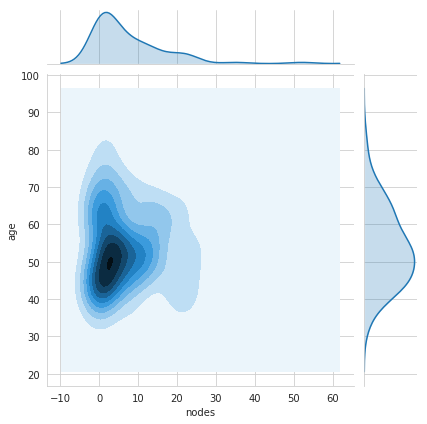

In [30]:
sb.jointplot(x="nodes",y="age",data=survived,kind="kde")
sb.jointplot(x="nodes",y="age",data=not_survived,kind="kde")
plt.show()

From the above graphs we can conclude that nodes has a significant role to play in survival.

    1. The first graph has the concentrated area near the node 0 - 3, in the age group of 47 - 63
    2. The second graph has the concentrated area near the node 1 -11, in the age group of 45-55
    3. The age group is almost same in both the cases. thus we can conclude that the age has no significant effect on survival stats

### Brief Summary

From the above stats, we can conclude

    1. nodes <= 3, more chances of survival as almost 75% survived data points got covered in this range
    2. nodes > 4 goes to 50% chance of not surviving as almost 50% of the not-survivied dat points got covered in this range
    3. Out of 87 data points of not survived data 50% gets covered from 1 - 4 number of nodes